In [2]:
import cv2
from PIL import Image
from datetime import datetime
import matplotlib.pyplot as plt

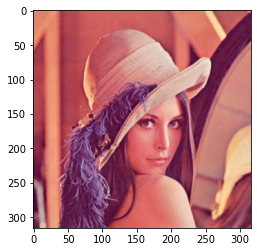

In [6]:
pictPath = r'haarcascade_frontalface_default.xml'
imgPath = r"./data/Lenna.jpg"
face_cascade= cv2.CascadeClassifier(pictPath)
img = cv2.imread(imgPath)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



In [7]:
t1= datetime.now()#测试起始时间
faces = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=3, minSize=(20,20))
t2 = datetime.now()#测试结束时间
print('time spend for face_detection: ', t2-t1)#显示总的时间开销

# 標註右下角底色黃色
cv2.rectangle(img, (img.shape[1]-120, img.shape[0]-20), (img.shape[1], img.shape[0]), (0,255,255),-1)
# 標註找到多少人臉
cv2.putText(img, 'Find '+ str(len(faces)) + ' face', (img.shape[1]-110,img.shape[0]-5), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,0,0), 1)

time spend for face_detection:  0:00:00.015635


array([[[125, 137, 225],
        [130, 137, 224],
        [125, 137, 225],
        ...,
        [125, 149, 233],
        [121, 145, 229],
        [101, 115, 211]],

       [[125, 137, 225],
        [130, 137, 224],
        [125, 137, 225],
        ...,
        [125, 149, 233],
        [121, 145, 229],
        [101, 115, 211]],

       [[125, 137, 225],
        [130, 136, 225],
        [127, 137, 225],
        ...,
        [125, 149, 233],
        [118, 144, 228],
        [101, 115, 211]],

       ...,

       [[ 63,  28,  92],
        [ 61,  26,  90],
        [ 65,  28,  92],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[ 60,  21,  83],
        [ 59,  23,  89],
        [ 65,  26,  94],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[ 58,  22,  82],
        [ 58,  30,  90],
        [ 64,  30,  95],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]]

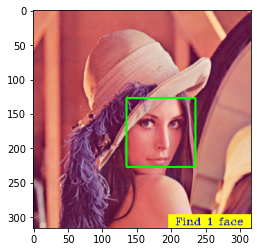

In [9]:
num=1
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    filename = 'face' + str(num) +'.jpg'
    image = Image.open(imgPath)
    imageCrop = image.crop((x,y,x+w,y+h))
    imageResize = imageCrop.resize((150,150), Image.ANTIALIAS)
    # imageResize = imageCrop.resize((150,150), Image.LANCZOS)
    imageResize.save(filename)
    num +=1

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()